# K Nearest Neighbors Project 

This data set will include artifical data, and features that are unknown to us.
## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

## Data

In [2]:
# Reading csv file as df
df = pd.read_csv('KNN_Project_Data')

In [3]:
# Target Class 0 or 1
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
df.tail()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
995,1343.060600,1289.142057,407.307449,567.564764,1000.953905,919.602401,485.269059,668.007397,1124.772996,2127.628290,0
996,938.847057,1142.884331,2096.064295,483.242220,522.755771,1703.169782,2007.548635,533.514816,379.264597,567.200545,1
997,921.994822,607.996901,2065.482529,497.107790,457.430427,1577.506205,1659.197738,186.854577,978.340107,1943.304912,1
998,1157.069348,602.749160,1548.809995,646.809528,1335.737820,1455.504390,2788.366441,552.388107,1264.818079,1331.879020,1
999,1287.150025,1303.600085,2247.287535,664.362479,1132.682562,991.774941,2007.676371,251.916948,846.167511,952.895751,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.0 KB


In [6]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


# Exploratory Data Analysis

Since this data is artificial, we'll just do a large pairplot with seaborn.

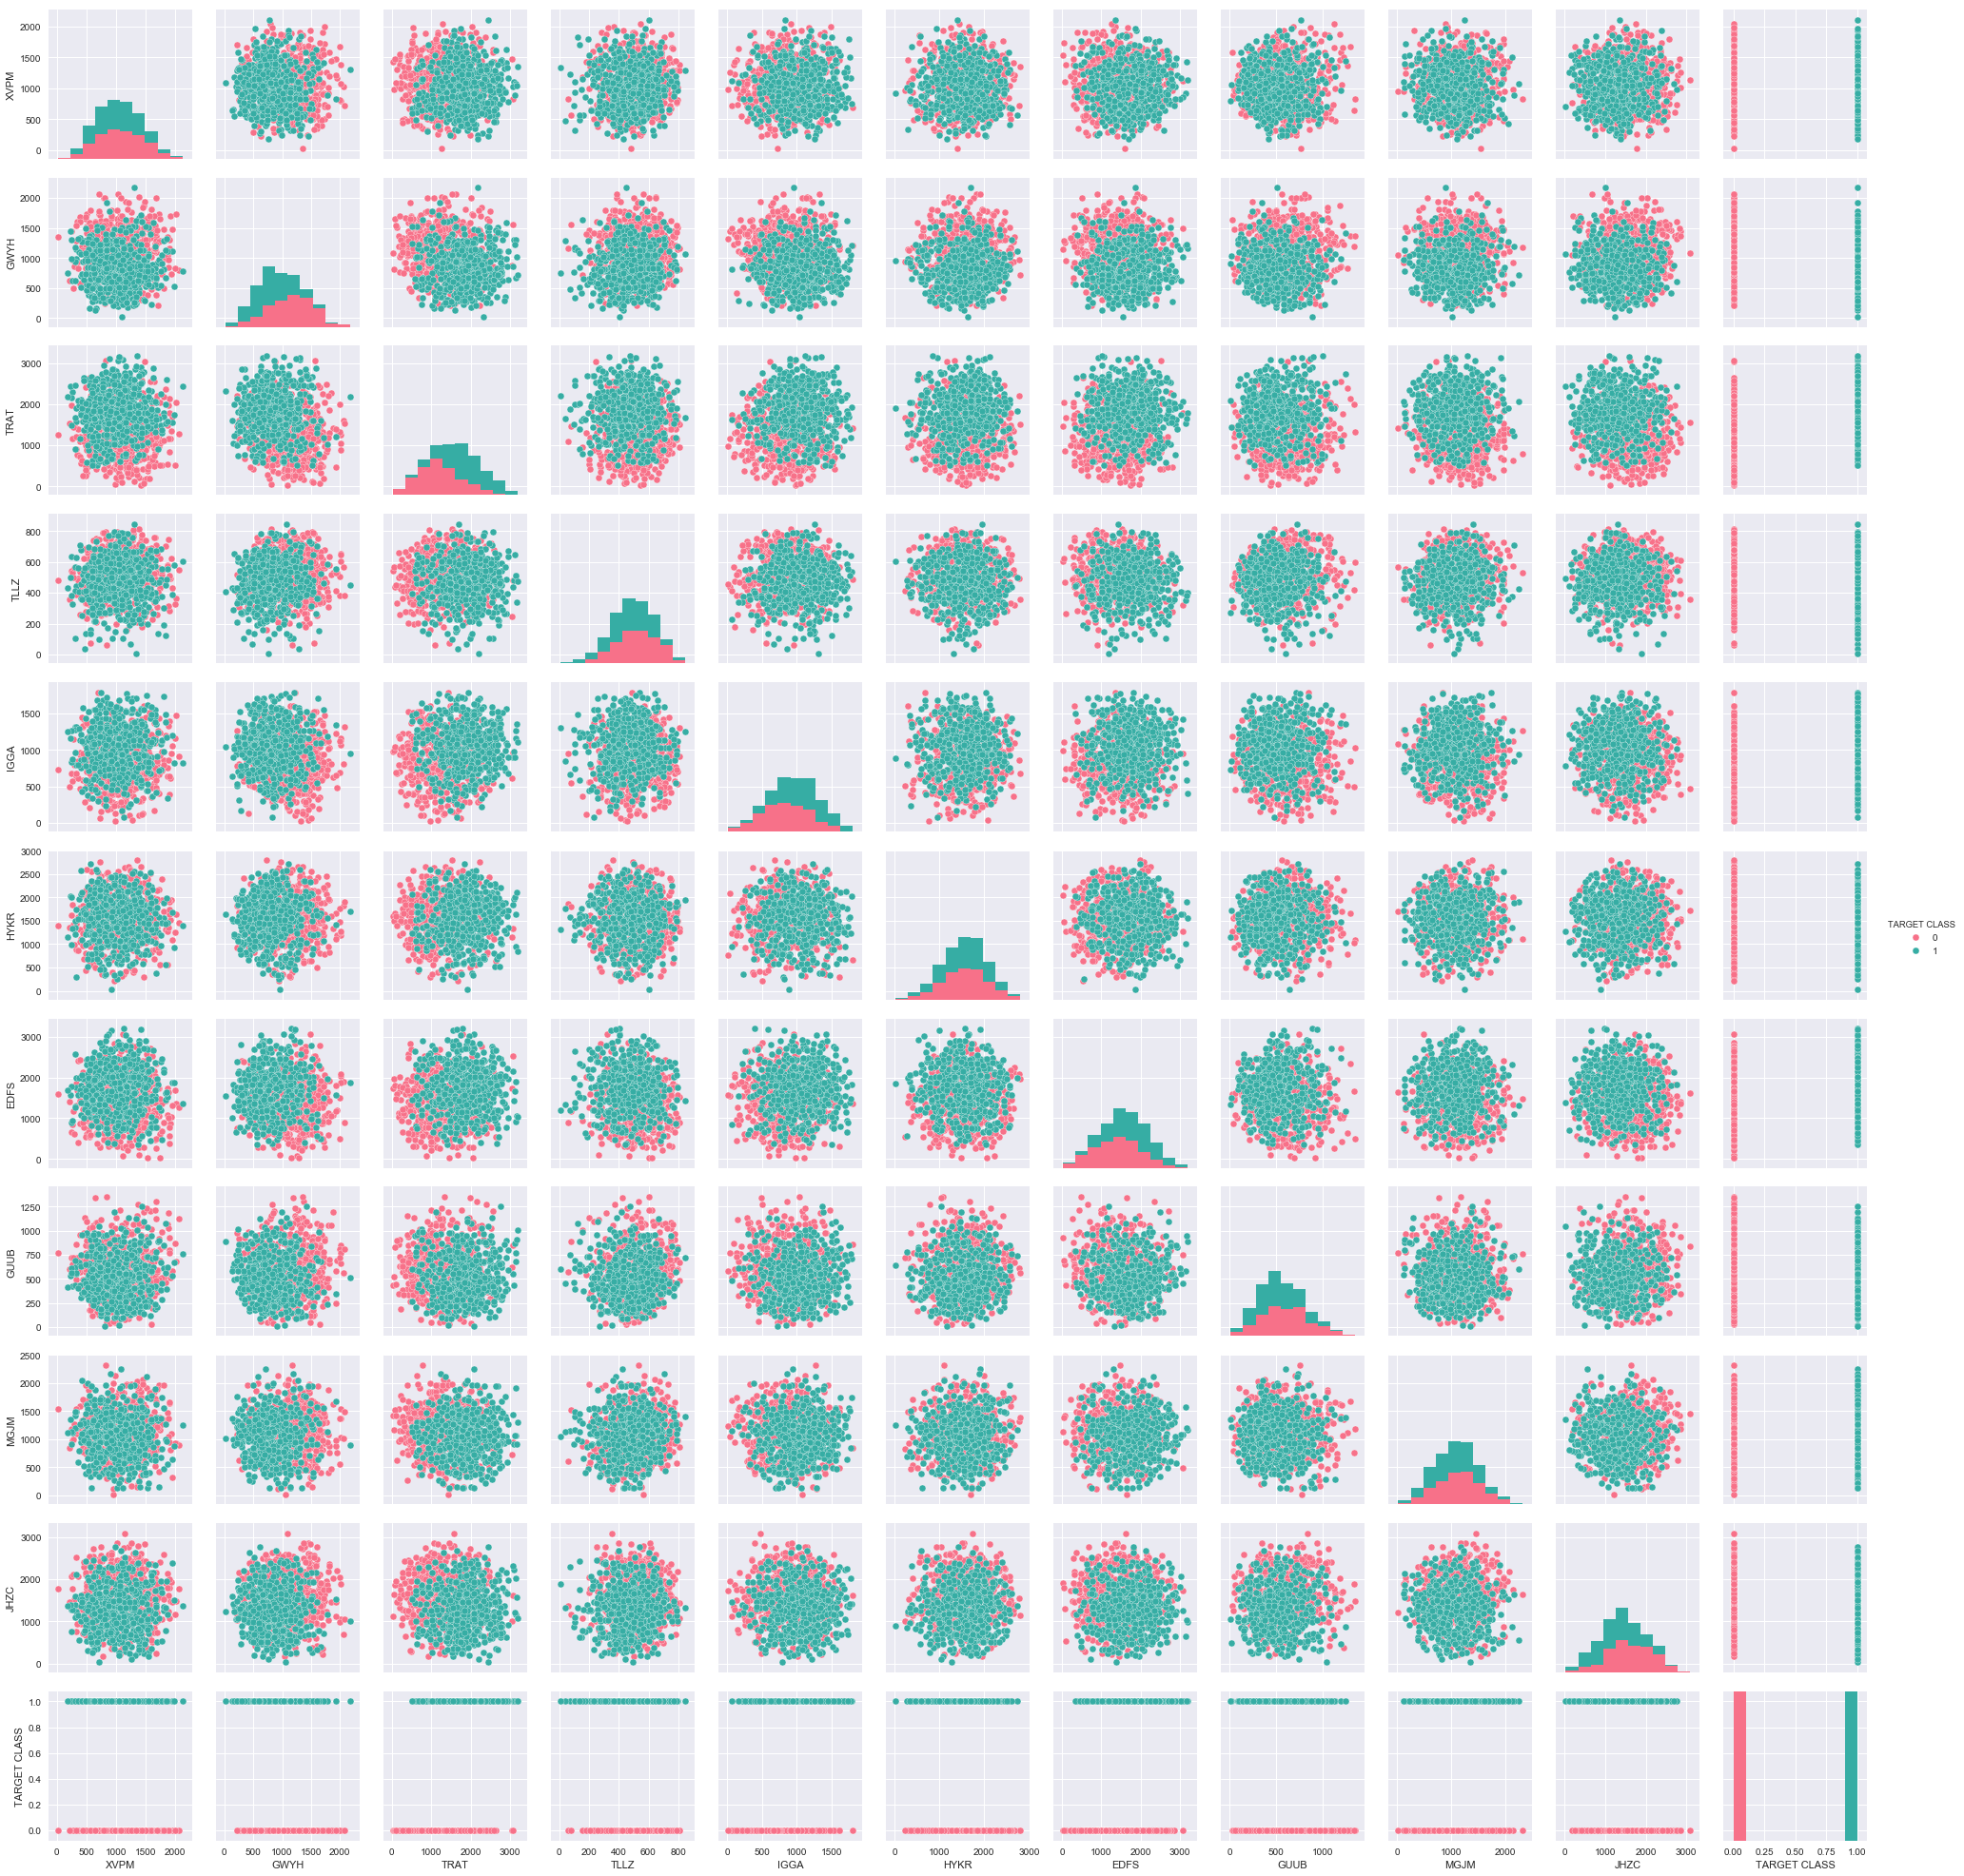

In [9]:
# Using Seaborn pairplot on dataframe with hue = Target Class
sb.pairplot(data=df,hue='TARGET CLASS',palette='husl')

# Standardize the Variables

The KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [10]:
# Import StandardScalar from Sklearn
from sklearn.preprocessing import StandardScaler

In [11]:
# Create scaler instance
scaler = StandardScaler()

In [12]:
# Fit the features of the data with the scaler object
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
# .transform() method used to transform features to scaled version
scaled_feat = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [14]:
# New dataframe with the scaled features
df_feat = pd.DataFrame(scaled_feat,columns=df.columns[:-1])

In [15]:
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

In [16]:
# Train/Test Split import, test size at 0.3, random state at 101
from sklearn.model_selection import train_test_split

In [17]:
X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Using KNN

In [18]:
#Import KNeighborsClassifier from Sklearn
from sklearn.neighbors import KNeighborsClassifier

In [19]:
#Create a KNN model instance with n_neighbors=1
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
# Fit the KNN model to the trainind data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model.

In [21]:
# Use predict method to predict values with the KNN model and X_test
pred = knn.predict(X_test)

In [22]:
# Import and create confusion matrix and classification report from sklearn
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
print(confusion_matrix(y_test,pred))

[[109  43]
 [ 41 107]]


In [24]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.73      0.72      0.72       152
          1       0.71      0.72      0.72       148

avg / total       0.72      0.72      0.72       300



# Choosing a K Value
Our k value was equal to 1, so a loop was created to train various KNN models with different k values, then keep track of the error_rate for each of these models with a list.

In [26]:
#Loop for k values between 1 and 39, error rate appended to error_rate list.
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

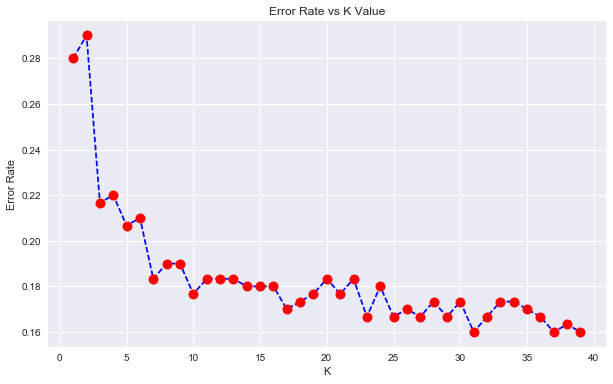

In [27]:
#Create plot using the information from the loop
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)

plt.title("Error Rate vs K Value")
plt.xlabel('K')
plt.ylabel("Error Rate")

As we'd expect, a greater k value will decrease the error rate. The error rate is between 0.16-0.18 for k > 30.

## Retrain with new K Value

I decided to retrain the KNN model using a new K value of n_neighbor = 50.

In [30]:
# Set k value equal to n_neighbors=50.
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[126  26]
 [ 24 124]]


             precision    recall  f1-score   support

          0       0.84      0.83      0.83       152
          1       0.83      0.84      0.83       148

avg / total       0.83      0.83      0.83       300



The accuracy of the KNN model with k value at 50 is heigher (around 80%) than when a KNN model with a k value of 50 (70%).